In [1]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 320.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [3]:
# Let's start with calling all dependencies that we will use for this exercise 
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
# define the ticker you will use
nio = yf.Ticker('NIO')
#Display stock information, it will give you a summary description of the ticker
nio.info

{'zip': '201804', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 15204, 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. It offers five, six, and seven-seater electric SUVs, as well as smart electric sedans. The company is also involved in the provision of energy and service packages to its users; design and technology development activities; manufacture of e-powertrains, battery packs, and components; and sales and after sales management activities. In addition, it offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Power Charger, a fast-charging solution; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service, where it offers vehicle pick up, charging, and swapping services. Further, the company provides 

In [5]:
history = nio.history(period="Max")
df = pd.DataFrame(history)
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0
2018-09-19 00:00:00-04:00,7.88,9.15,7.54,8.50,48306500,0.0,0.0
2018-09-20 00:00:00-04:00,9.07,9.47,8.42,8.78,40275000,0.0,0.0
2018-09-21 00:00:00-04:00,9.05,9.07,8.50,8.59,15118500,0.0,0.0
2018-09-24 00:00:00-04:00,8.32,8.39,7.85,7.87,16297900,0.0,0.0


In [10]:
print(f"Qt.Anos (dias/366) = {len(df)/366}")

Qt.Anos (dias/366) = 3.019125683060109


In [11]:
# defining x and y 
x = df.index
y = df['Close']
y

Date
2018-09-12 00:00:00-04:00     6.60
2018-09-13 00:00:00-04:00    11.60
2018-09-14 00:00:00-04:00     9.90
2018-09-17 00:00:00-04:00     8.50
2018-09-18 00:00:00-04:00     7.68
                             ...  
2023-01-26 00:00:00-05:00    12.17
2023-01-27 00:00:00-05:00    12.71
2023-01-30 00:00:00-05:00    12.02
2023-01-31 00:00:00-05:00    12.07
2023-02-01 00:00:00-05:00    12.10
Name: Close, Length: 1105, dtype: float64

In [13]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

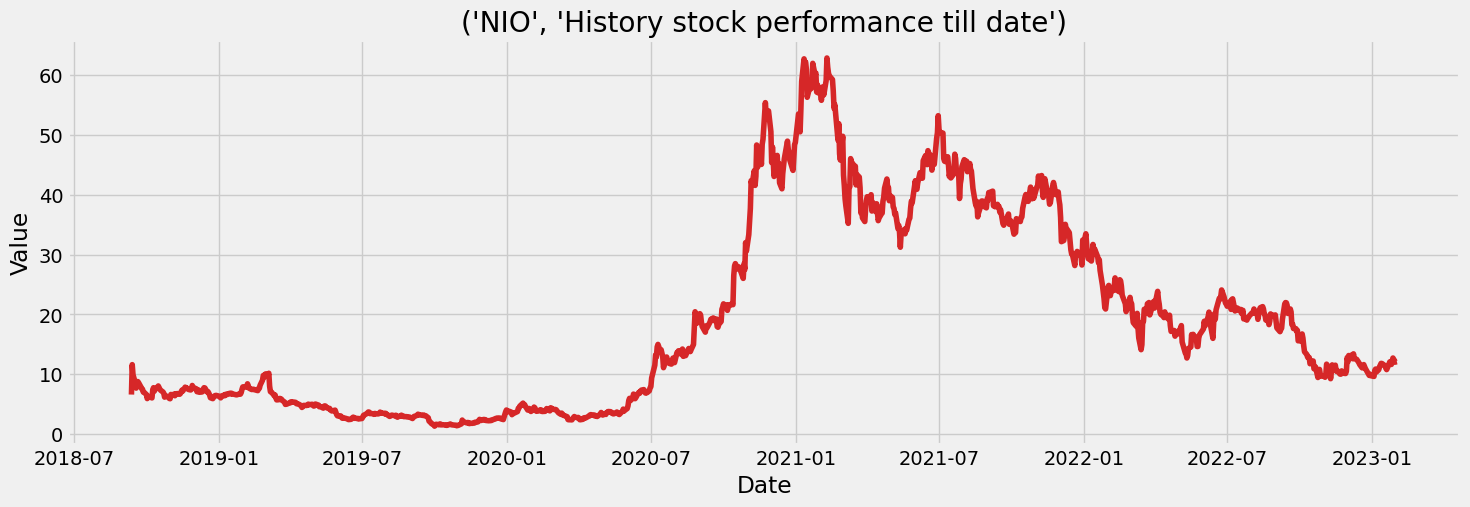

In [14]:
stock_name= "NIO"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [16]:
# Data Processing and scaling
df.reset_index(inplace=True) # to reset index and convert it to column

In [17]:
df.head(2)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000,0.0,0.0
1,1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500,0.0,0.0


In [25]:
df=df[['Date','Open','High','Low','Close','Volume','Dividends','Stock Splits']]

In [26]:
df.columns=['date','open','high','low','close','vol','divs','split']

In [27]:
df

,date,open,high,low,close,vol,divs,split
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.350,6.60,66849000,0.0,0.0
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.520,11.60,158346500,0.0,0.0
2,2018-09-14 00:00:00-04:00,12.66,13.80,9.220,9.90,172473600,0.0,0.0
3,2018-09-17 00:00:00-04:00,9.61,9.75,8.500,8.50,56323900,0.0,0.0
4,2018-09-18 00:00:00-04:00,8.73,9.10,7.670,7.68,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...
1100,2023-01-26 00:00:00-05:00,12.43,12.47,11.800,12.17,51635100,0.0,0.0
1101,2023-01-27 00:00:00-05:00,12.15,13.22,11.980,12.71,69488000,0.0,0.0
1102,2023-01-30 00:00:00-05:00,12.43,12.44,11.850,12.02,54970000,0.0,0.0
1103,2023-01-31 00:00:00-05:00,11.91,12.36,11.760,12.07,45863100,0.0,0.0


In [28]:
df.drop(columns=['divs','split']).head(2) # We are dropping un necessary columns from the set

,date,open,high,low,close,vol
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500


In [29]:
df['date'] = pd.to_datetime(df.date)

<ipython-input-29-29df32ab58f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df.date)


In [30]:
df.describe()

,open,high,low,close,vol,divs,split
count,1105.000000,1105.000000,1105.000000,1105.000000,1.105000e+03,1105.0,1105.0
mean,18.997195,19.599946,18.327398,18.974842,6.435603e+07,0.0,0.0
std,16.171199,16.618588,15.632582,16.142588,6.070914e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,4.820000,5.000000,4.690000,4.840000,3.054640e+07,0.0,0.0
50%,13.450000,13.950000,12.670000,13.360000,4.946580e+07,0.0,0.0
75%,33.349998,34.160000,31.879999,33.400002,7.603340e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [31]:
print(len(df))

1105


In [32]:
x = df[['open', 'high','low', 'vol']]
y = df['close']

In [33]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [34]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
(551, 4)
(98, 4)
(551,)
(98,)

(939, 4)
(166, 4)
(939,)
(166,)


(98,)

In [50]:
# Train=939
# Test=166
939+166

1105

In [41]:
 # model = function_train(train_data)
 # prediction_data = model.prediction(test_data)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.71850982e-01  9.61378711e-01  7.05308274e-01 -2.41278886e-10]
regression intercept -0.01062789280189591


In [46]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9954295945566622


In [47]:
predicted=regression.predict(test_x)
print(test_x.head())

          open       high        low       vol
939  18.990000  19.799999  18.799999  68726800
940  18.980000  19.680000  18.600000  49357200
941  20.320000  20.450001  19.860001  65311600
942  18.719999  19.680000  18.450001  73635000
943  18.860001  19.180000  17.809999  61204800


In [48]:
predicted.shape

(166,)

In [51]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
939,19.180000,19.509433
940,19.650000,19.264399
941,20.379999,19.989220
942,18.820000,19.327427
943,18.139999,18.304279
944,15.990000,16.324905
945,18.660000,18.841453
946,20.110001,19.521818
947,19.180000,19.271954
948,20.770000,20.686009


In [52]:
dfr.describe()

,Actual_Price,Predicted_Price
count,166.000000,166.000000
mean,15.685663,15.719978
std,4.540717,4.556872
min,9.250000,8.777077
25%,11.252500,11.265554
50%,15.675000,15.878548
75%,20.102500,19.954609
max,24.080000,23.944275


In [53]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.24927341334796446
Mean Squared Error (MSE) : 0.09366544901429127
Root Mean Squared Error (RMSE): 0.3060481155215488


In [54]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.78170993429964


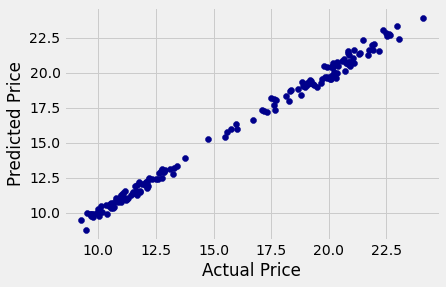

In [55]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

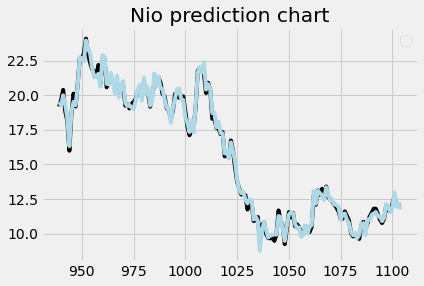

In [56]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Nio prediction chart")
plt.legend();